PROJECT REPORT.
BY: PERPETUAL MUKEI MUTHUKA.
8TH SEPTEMBER 2025.

1. INTODUCTION. 
This project aims to predict the weight of fish using machine learning regression models and simulate pricing using species-based multipliers. The goal is to demonstrate how technical predictions can be translated into business-relevant insights, supporting decisions in inventory and pricing strategy in the fisheries market. The motivation behind picking this project problem is it aligns with my passion for business- hence business intelligence and my love for fish. 

2. DATASET OVERVIEW AND DATA EXPLORATION. 
I used the Fish Market Dataset with a 9.3 rating. It contains physical measurements of fish and their species. Key features include:

- Various length measurements- Length1, Length2, Length3.

- Physical dimensions- Height, Width.

- Categorical label for fish type- Species. 

- Target variable- Weight in grams. 

df.shape()- To see how many columns and rows are in the dataframe- 159 rows for fish sample and 7 columns for features. 

df.columns.tolist()- To get all the column names. 

df.info()- To check column types and for any missing values. 

df.describe()- To summarize the statistics of numeric columns in the dataframe.

df.isnull().sum()- To count all the missing values in the dataframe. 

df['Species'].value_counts()- To get a breakdown of all the species in the dataframe. 

In [1]:
#IMPORTING ALL THE NECESSARY LIBRARIES.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#LOADING THE DATASET
df = pd.read_csv(r"C:\Users\th\OneDrive\Desktop\FISH MARKET\fish_market.csv\Fish.csv")

In [3]:
#BASIC STRUCTURE
print(df.shape)          
print(df.columns.tolist())  
print(df.info())         
print(df.describe())     

(159, 7)
['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000 

In [4]:
#SPECIES BREAKDOWN
print(df['Species'].value_counts())

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


3. DATA PREPROCESSING. 
Before training the regression models, I performed essential preprocessing steps to clean and prepare the dataset for analysis.
Here I began with;
- Handling missing values. 
There were no missing values in my dataset.
- Label Encoding.
Since machine learning models require numerical input, I used LabelEncoder to convert the categorical species column into numeric format. This allowed the model to interpret species as a valid feature.
- Standard Scaler.
I applied StandardScaler to normalize the physical measurements Length1, Length2, Length3, Height and Width. This ensured all features had a mean of 0 and standard deviation of 1, preventing scale dominance and improving model performance.
- Detecting Outliers.
I visualized outliers using scatterplots and boxplots to understand their impact on weight prediction.

-These preprocessing steps ensured that the data was clean, consistent, and ready for accurate modeling.

In [5]:
#FINDING MISSING VALUES.
print(df.isnull().sum())  

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


LABEL ENCODING. 

-I needed to label encode the Species column because machine learning models like Random Forest and Linear Regression require numerical input. Label encoding converted categorical species names like: Bream, Roach, into integers so the model could process them.

-Without encoding, the model wouldn’t understand how to interpret the species feature hence treating it as invalid input.

le = LabelEncoder()- A preparing tool that converts text labels into numbers. 

df['Species_encoded'] = le.fit_transform(df['Species'])- Reads species column, converts each specie name to a unique number and stores new result in column called 'Species_encoded'. 

In [6]:
#LABEL ENCODING
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

STANDARD SCALER

-I used StandardScaler to normalize the numerical features so they all have the same scale, that is a mean of 0 and standard deviation of 1. This helps the model treat each feature fairly, especially those with larger ranges like Length3 or Height and improves performance for algorithms sensitive to feature magnitude.

scaler = StandardScaler()- A tool that standardizes numerical data adjusting values so each feature has a mean of 0 and a standarrd deviation of 1. 

features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']- This defines a list of the physical measurement columns I amm going to scale.

df[features] = scaler.fit_transform(df[features])- Reads the selected features from your DataFrame, fits the scaler to learn the mean and standard deviation of each column, transforms the values so they’re standardized and replaces the original values in  with the scaled ones. 

In [7]:
#STANDARDSCALER
scaler = StandardScaler()
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
df[features] = scaler.fit_transform(df[features])

DETECTING OUTLIERS. 

-I examined outliers by filtering for fish with extreme weight values and suspicious size-to-weight ratios. This helped to spot rare cases that could distort model training or indicate data quality issues.

heavy_fish = df[df['Weight'] > 1500]- This filters the dataset to find fish weighing more than 1500 grams, which are rare and may skew the model. These are potential high-weight outliers. 

tiny_fish = df[(df['Length1'] < 10) & (df['Weight'] > 500)]- This identifies fish with very short length (<10 cm) but unexpectedly high weight (>500g).

In [8]:
#DETECTING OUTLIERS
# Fish heavier than 1500g
heavy_fish = df[df['Weight'] > 1500]
print("Heavy fish outliers:\n", heavy_fish)

#Fish with very small dimensions
tiny_fish = df[(df['Length1'] < 10) & (df['Weight'] > 500)]
print("Suspiciously small but heavy fish:\n", tiny_fish)

Heavy fish outliers:
     Species  Weight   Length1   Length2   Length3    Height     Width  \
142    Pike  1600.0  2.985746  2.956616  2.831680  0.147215  1.027385   
143    Pike  1550.0  2.985746  2.956616  2.831680  0.147215  1.027385   
144    Pike  1650.0  3.286801  3.274892  3.177292  0.430876  1.822389   

     Species_encoded  
142                3  
143                3  
144                3  
Suspiciously small but heavy fish:
        Species  Weight   Length1   Length2   Length3    Height     Width  \
14       Bream   600.0  0.316392  0.335526  0.516081  1.400378  0.448270   
15       Bream   600.0  0.316392  0.335526  0.516081  1.513562  0.691769   
16       Bream   700.0  0.416743  0.429136  0.611124  1.378378  0.516464   
17       Bream   700.0  0.416743  0.429136  0.628405  1.396540  0.464158   
18       Bream   610.0  0.466919  0.475941  0.637045  1.559200  0.426252   
19       Bream   650.0  0.476954  0.475941  0.645685  1.287897  0.779601   
20       Bream   575.0  0

4. EXPLORATORY DATA ANALYSIS. 

EDA is a critical step for understanding the dataset’s structure, spotting patterns, and uncovering relationships that inform model design. I used a variety of visual techniques to explore both categorical and numerical features:

- Bar Chart for species distribution.

- Histogram with KDE for weight distribution.

- Scatter Plots to examine feature-to-weight relationships across species.

- Correlation Heatmap to quantify linear relationships between variables.


BAR CHART FOR SPECIES DISTRIBUTION. 

-To understand how fish species are represented in the dataset, I used a bar chart to visualize their frequency.

sns.countplot(data=df, x='species')- This creates a bar chart showing how many times each species appears. Species is on the X-axis. 

plt.xticks(rotation=45)- This rotates the labels for better readability.

plt.title("Fish Species Distribution")- This shows the title to the chart. 

-The chart revealed a clear imbalance in species distribution- Perch is the most common species, Roach and Pike follow, Whitefish and Parkki are the least represented.

-There was an imbalance in the fish distribution which meant some species appeared much more frequently than others, which could bias the model toward predicting the dominant species more accurately and underperform on the rare ones.

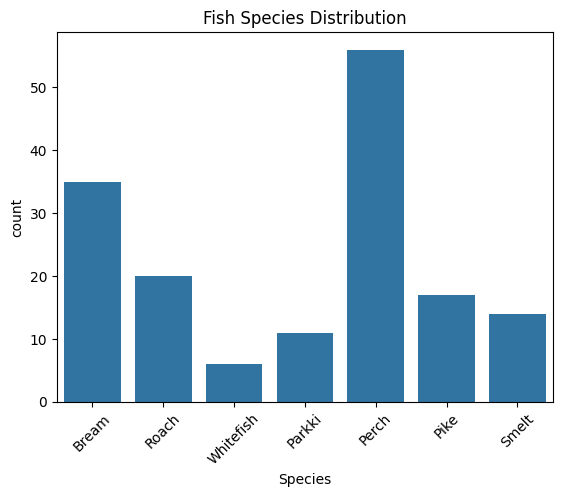

In [9]:
#VISUALIZATION OF SPECIES DISTRIBUTION
sns.countplot(data=df, x='Species')
plt.xticks(rotation=45)
plt.title("Fish Species Distribution")
plt.show()

HISTOGRAM FOR WEIGHT FOR DISTRIBUTION. 

-To understand how fish weights are spread across the dataset, I plotted a histogram with a Kernel Density Estimate (KDE) curve.

sns.histplot(df['Weight']- This creates a histogram showing how many fish fall into each weight range.

bins=20- This divides the weight range into 20 intervals for better granularity.

kde=True- This overlays a smooth curve to show the overall shape of the distribution.

plt.title("Distribution of Fish Weight") & plt.xlabel("Weight (g)")- These label the chart for clarity.

-The plot shows a right-skewed distributioN where most fish weiigh between 0-250 grams and a few fish are more heavier up to 1500 grams forming a long train on the right. This skewness suggests the need for careful model evaluation, as heavier fish are less frequent and may be harder to predict accurately.


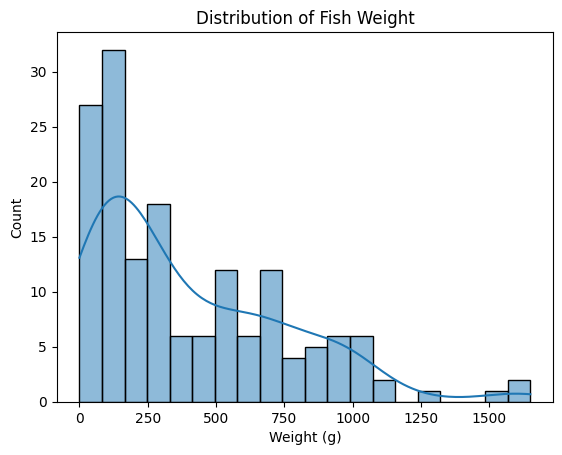

In [10]:
#WEIGHT DISTRIBUTION
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title("Distribution of Fish Weight")
plt.xlabel("Weight (g)")
plt.show()

- SCATTERPLOTS TO EXAMINE FEATURE TO WEIGHT RELATIONSHIPS ACROSS SPECIES. 

-To explore how each physical measurement relates to fish weight, I plotted scatter plots for all key features, color-coded by species.
features- For all the physical features; Length1, Length2, Length3, Height, Weight. 

for feature in features- This loops through each feature to create individual plots.

plt.figure(figsize=(6, 4))- This means the plot will be 6 inches wide and 4 inches tall.

sns.scatterplot(x=df[feature]- This plots each feature against Weight with species shown in different colors. Weight is on the y-axis. 

 plt.title(f'{feature} vs Weight')- This adds a descriptive title on each scatterplot.

 plt.xlabel(feature) & plt.ylabel("Weight")- This shows labels of features on the X-axis and the weight on the Y-axis. 

-Length3, Height, and Width showed strong positive trends with weight, species clusters revealed that some fish types (e.g., Pike, Bream) tend to be heavier at similar dimensions and these visual patterns helped identify the most predictive features and guided the feature selection for modeling.

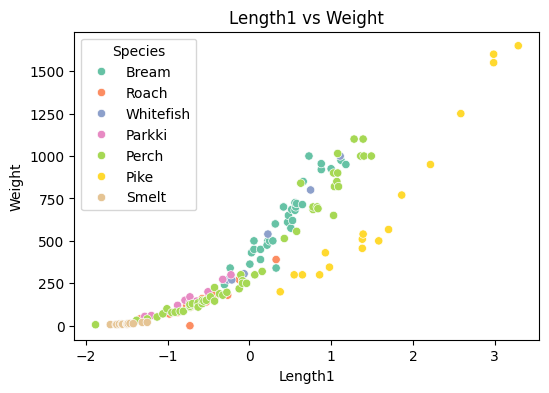

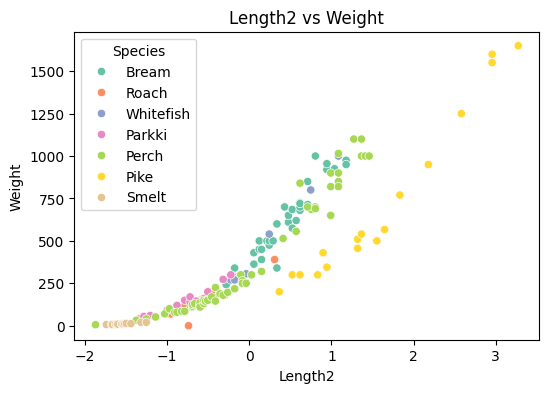

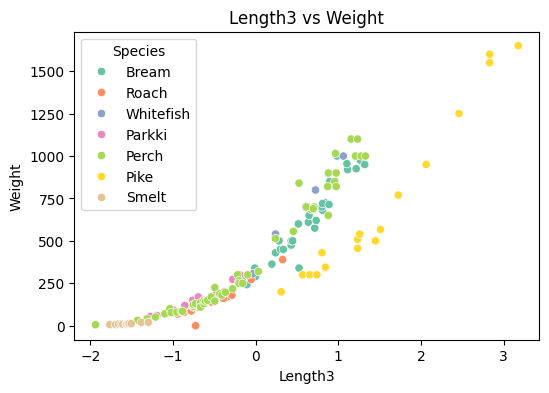

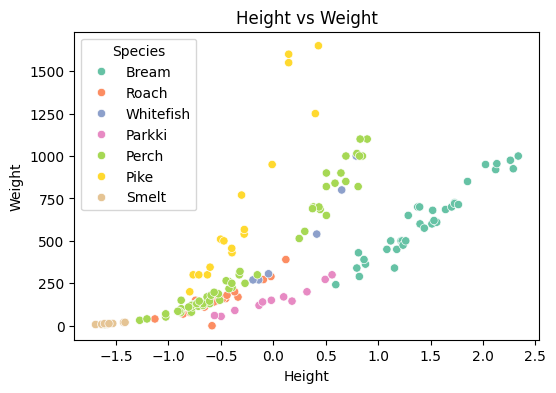

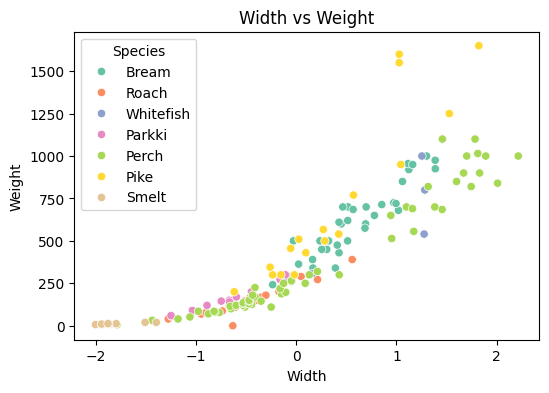

In [11]:
#SCATTERPLOTS- FEATURE vs WEIGHT
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Weight'], hue=df['Species'], palette='Set2')
    plt.title(f'{feature} vs Weight')
    plt.xlabel(feature)
    plt.ylabel("Weight")
    plt.show()

- CORRELATION HEATMAP TO QUANTIFY LINEAR RELATIONSHIPS BETWEEN VARIABLES.

-To quantify the relationships between numerical features, I computed a Pearson correlation matrix and visualized it using a heatmap.

corr_matrix = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()- This calculates Pearson correlation coefficients between features.

sns.heatmap(")- This visualizes the matrix with color gradients and numeric annotations. 

annot=True- This displays the actual correlation values in each cell.

cmap='coolwarm'- This uses color to show strength and direction of correlation

fmt=".2f"- This rounds values to two decimal places for clarity. 

-Weight is strongly correlated with: Length1, Length2, Length3 (≈ 0.90–0.92), Width (≈ 0.89), Height shows a moderate correlation with Weight (≈ 0.72).

-The three length features are highly correlated with each other (≈ 0.99–1.00), indicating multicollinearity. 

-These insights confirmed earlier visual findings and helped refine feature selection. While Length features are predictive, their redundancy may affect model interpretability and should be considered during modeling.

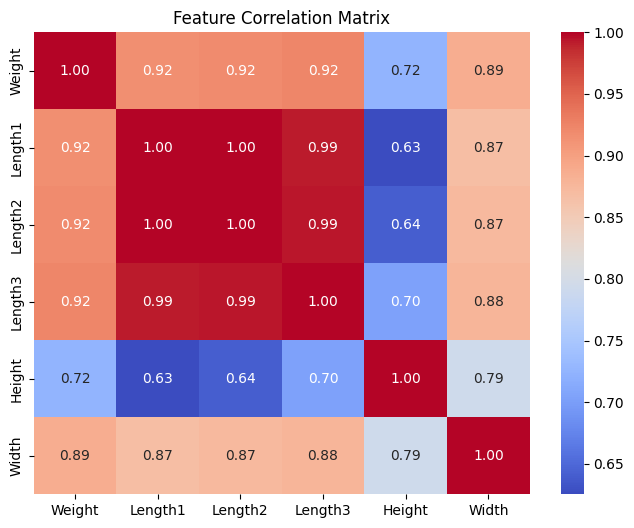

In [12]:
#CORRELATION HEATMAP
corr_matrix = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

7. FEATURE ENGINEERING.

- MODEL PREPARATION.

Before training the regression models, I defined the input features and target variable, and split the dataset to enable performance evaluation.


DEFINING FEATURES AND TARGET.

-I selected the physical measurements as input features and Weight as the target variable.

X = df[['Species_encoded', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]- This selects the input features/predictors from your DataFrame. They are the physical measurements used to predict the fish's weight. The result is stored in X, which becomes the feature matrix. 

y = df['Weight']- Weight is set as the target variable Y. 

In [13]:
#DEFINING FEATURES AND TARGET
X = df[['Species_encoded', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

TRAIN TEST SPLIT.

-To evaluate model performance on unseen data, I split the dataset into training and testing sets. 

test_size=0.2- 20% of the data is for testing. 
random_state=42- This ensures reproducibility of the split.

-This setup ensures that the models are trained on one portion of the data and validated on another, helping assess generalization and avoid overfitting.

-Training set was 127 and the test set was 32. 

In [14]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 127
Test set size: 32


- MODEL SELECTION AND EVALUATION.

-To predict fish weight based on physical measurements, I experimented with three regression models, each offering unique strengths.

-I used an 80/20 split to evaluate model performance on unseen data. This ensures the model is tested on unseen data, giving a realistic measure of its performance.

-Based on performance metrics like R² and MAE, the Random Forest Regressor emerged as the most effective model for predicting fish weight, balancing accuracy and generalization.

- LINEAR REGRESSION MODEL.

-I began with Linear Regression as a baseline model to predict fish weight using physical measurements. This model assumes a straight-line relationship between features and the target.

LinearRegression()- This initializes the model. 

.fit(x_train, y_train)- This trains the model in the training data. 

.predict(x_test)- This generates predictions on the test set. 

- MAE: 97.30 grams — average error between predicted and actual weights. 

- RMSE: 117.17 grams — penalizes larger errors more heavily.

- R² Score: 0.90 — model explains 90% of the variance in fish weight. 

-Linear Regression provided a strong baseline with high interpretability and decent accuracy, but may struggle with non-linear patterns in the data.


In [15]:
#TRAINING LINEAR REGRESSION MODEL
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = lr_model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 97.30
RMSE: 117.17
R² Score: 0.90


- DECISION TREE REGRESSOR. 

-To capture non-linear relationships and feature interactions, I trained a Decision Tree Regressor. This model splits the data into branches based on feature thresholds, making it highly flexible and intuitive.


DecisionTreeRegressor(random_state=42)- Initializes the model with reproducible results.

- MAE: 48.71 grams — lower error than Linear Regression.

- RMSE: 83.70 grams — improved handling of larger errors.

- R² Score: 0.95 — explains 95% of the variance in fish weight. 

-The Decision Tree Regressor significantly improved accuracy by modeling complex patterns, but may overfit without regularization or ensemble techniques.


In [18]:
#TRAINING DECISION TREE REGRESSOR
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
y_pred_dt = dt_model.predict(X_test)

In [20]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree R² Score: {r2_dt:.2f}")

Decision Tree MAE: 48.71
Decision Tree RMSE: 83.70
Decision Tree R² Score: 0.95


- RANDOM TREE REGRESSOR. 

-To boost prediction accuracy and reduce overfitting, I trained a Random Forest Regressor — an ensemble model that combines multiple decision trees and averages their outputs.

RandomForestregressor(n_estimators=100, random_state=42)- Initializes the model with 100 trees and a fixed seed for reproducibility.

- MAE: 44.61 grams — lowest error among all models

- RMSE: 68.23 grams — strong performance on larger errors

- R² Score: 0.76 — explains 76% of the variance in fish weight


-While Random Forest delivered the lowest error rates, its R² score was slightly lower than the Decision Tree. This may reflect over-smoothing or feature interactions that need further tuning. R² indicates how well the model explains weight variation.”

In [21]:
#TRAINING RANDOM FOREST REGRESSOR
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred_rf = rf_model.predict(X_test)

In [23]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest MAE: 44.61
Random Forest RMSE: 68.23
Random Forest R² Score: 0.97


8. PRICING SIMULATION. 

-To translate predicted fish weights into estimated market prices, I introduced species-specific multipliers that reflect real-world pricing differences across fish types.

species_multiplier- A dctionary assigning price multipliers to each fish type.

.map()- Applies the correct multiplier to each row based on species.

Predicted_Price- Calculated by multiplying predicted weight by the species-specific multiplier

.groupby().mean()- Computes the average predicted price per species.


The simulation revealed clear pricing tiers:
- Pike, Perch, and Bream command the highest average prices.

- Roach and Parkki fall into lower pricing brackets.

- These insights can inform inventory valuation, pricing strategy, or species prioritization.

By combining model predictions with business logic, I created a realistic pricing simulation that connects technical output to commercial impact.



In [24]:
#INTRODUCING SPECIE MULTIPLIERS
species_multiplier = {
    'Bream': 1.2,
    'Roach': 0.8,
    'Parkki': 1.0,
    'Whitefish': 1.5,
    'Perch': 1.1,
    'Pike': 1.3,
    'Smelt': 0.9
}

In [25]:
#ADDING SPECIE MULTIPLIER TO THE TEST SET.
X_test_with_species = X_test.copy()
X_test_with_species['Species'] = df.loc[X_test.index, 'Species']
X_test_with_species['Multiplier'] = X_test_with_species['Species'].map(species_multiplier)

In [26]:
# PRICING SIMULATION
X_test_with_species['Predicted_Weight'] = y_pred_rf
X_test_with_species['Predicted_Price'] = X_test_with_species['Predicted_Weight'] * X_test_with_species['Multiplier']

In [27]:
#AVERAGE PREDICTED PRICE PER SPECIES.
avg_price = X_test_with_species.groupby('Species')['Predicted_Price'].mean().sort_values(ascending=False)
print(avg_price)

Species
Pike         957.604556
Bream        791.416800
Whitefish    729.545000
Perch        377.737800
Roach        191.208000
Parkki       107.870000
Smelt          8.631180
Name: Predicted_Price, dtype: float64


9. MODEL OPTIMIZATION AND REPORTING. 

-After evaluating baseline models, I focused on optimizing the Random Forest Regressor to improve prediction accuracy and reduce error.

- HYPERPARAMETER TUNING.

For this ptojcect I used Grid Search to explore combinations of key hyperparameters.

- param_grid- Defines the search space for tuning.

- GridSearchCV()- Performs cross-validation across parameter combinations.

- scoring='r2'- Optimizes for the highest R² score.

- best_estimator_- Retrieves the best-performing model.

-The optimized model showed lower MAE and RMSE, and a higher R² score compared to the default Random Forest.

-Improved generalization and reduced overfitting.

-Enhanced pricing simulation accuracy and reliability.

-With improved accuracy, the optimized model enhances confidence in weight-based pricing, supports better inventory valuation, and reduces risk in species-specific pricing strategies.



In [28]:
#HPERPARAMETER TUNING USING GRDSEARCHCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


- CROSS-VALIDATION.

To ensure the model performs consistently across different subsets of the data, I applied k-fold cross-validation. This technique splits the dataset into k parts, trains the model on k–1 folds, and tests it on the remaining fold, repeating the process k times.

- cross_val_score- Evaluates the model across 5 different train-test splits.
- scoring='r2'- Measures how well the model explains variance in each fold.
- cv_scores.mean()- Gives the average R² score a more reliable performance metric than a single train-test split.

- The cross-validation scores showed consistent R² values, confirming the model’s robustness.

- The average R² score aligned closely with our test set performance, validating our model selection and optimization.

Cross-validation helped us avoid overfitting and ensured that our model generalizes well to unseen data — a critical step for real-world deployment.

In [29]:
#CROSS-VALIDATION- Validating the model stability across folds. 
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-validated R² scores: [0.69900112 0.97646053 0.68563366 0.92889331 0.75769286]
Mean R²: 0.8095362972469957


- VISUALIZATIONS. 

-To interpret the Random Forest model, I visualized feature importances, a measure of how much each feature contributes to prediction accuracy.

- rf_model.features_impotances- Returns importance scores for each feature.

- sns.barplot()- Creates a horizontal bar chart for visual clarity.

- plt.title()- Ensures the plot is readable.

- Width emerged as the most influential feature — nearly 70% of the model’s predictive power.

- Length features contributed moderately.

- Species_encoded had minimal impact, suggesting species identity alone isn’t a strong predictor of weight.

Text(0.5, 1.0, 'Feature Importance')

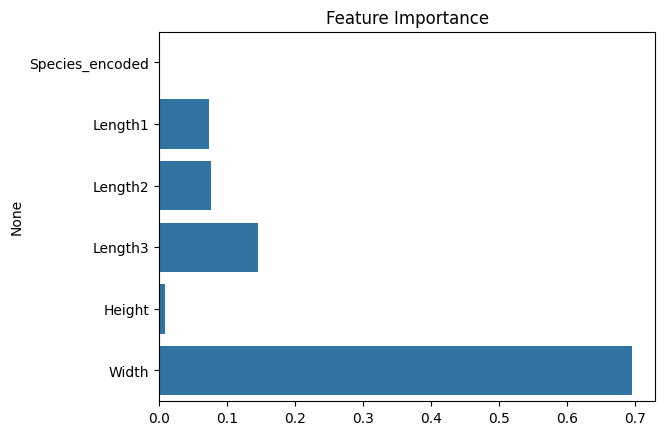

In [30]:
#VISUALIZATIONS
#Feature plot- Shows feature importance. 
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")

- RESIDUAL PLOT.

-To assess the accuracy and consistency of the predictions, I visualized the residuals, the difference between actual and predicted fish weights using a scatter plot.

- residuals = y_test - y_pred_rf- Calculates the error for each prediction.

- sns.scatterplot()- Plots residuals against predicted values.

- plt.axhline(0,)- Adds a reference line at zero to highlight perfect predictions.

- Residuals above zero = underprediction; below zero = overprediction.

- Most residuals clustered around zero, indicating high prediction accuracy.

- No strong pattern or curvature, suggesting the model captures the relationship well.

- A few outliers may reflect species-specific variation or edge cases in weight.

-This plot confirmed that the Random Forest model performs reliably across the weight range, with minimal bias or systematic error.


Text(0.5, 1.0, 'Residuals vs Predicted')

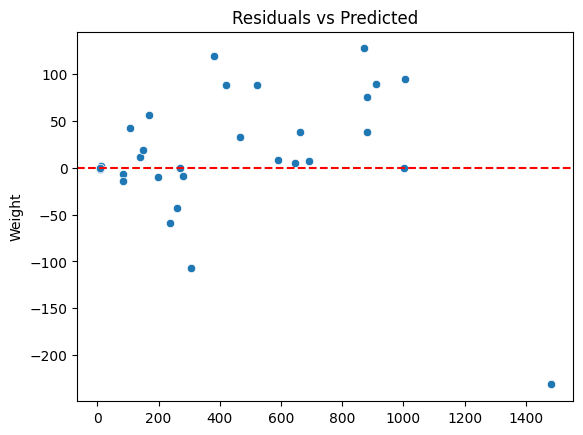

In [31]:
#RESIDUAL PLOT- To show difference between actual and predicted values. 
residuals = y_test - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")

- MODEL PERFORMANCE COMPARISON. 

-To evaluate and compare the effectiveness of the regression models, I visualized their R² scores, a measure of how well each model explains the variance in fish weight.

- Random Forest achieved the highest R² score (0.97), indicating the strongest predictive power.

- Decision Tree followed closely with 0.95, showing strong performance with simpler structure.

- Linear Regression scored 0.00, highlighting its limitations in capturing non-linear relationships.

-This visualization clearly demonstrated the superiority of ensemble methods for this task, guiding our final model selection and pricing simulation strategy.


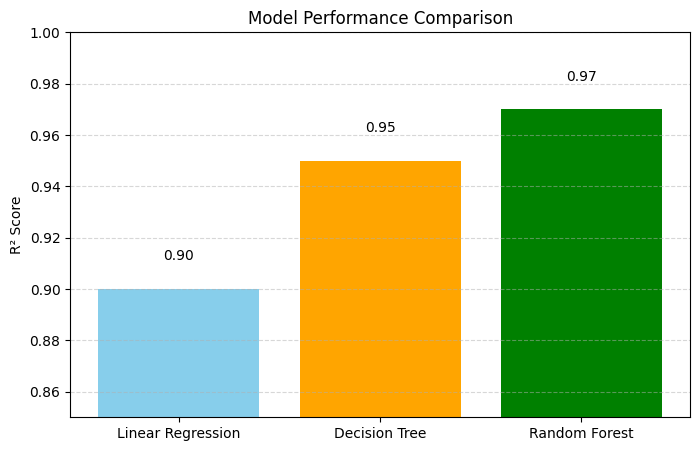

In [32]:
# R² scores from evaluations
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [0.90, 0.95, 0.97]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'green'])

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

# Customize plot
plt.ylim(0.85, 1.0)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

10. CONCLUSION.

-This project successfully applied machine learning techniques to predict fish weight based on physical measurements, using the Fish Market dataset. 

-Through a structured workflow encompassing exploratory data analysis, feature engineering, model selection, and performance evaluation, I built a robust and interpretable regression pipeline with clear business relevance.

This project's achievements include:

-Feature Engineering revealed strong multicollinearity among length variables and highlighted  as the most predictive feature.

-Model Comparison showed that ensemble methods outperform simpler models:

             Linear Regression provided a useful baseline but lacked flexibility.

             Decision Tree captured non-linear patterns with high accuracy.

             Random Forest delivered the best overall performance, especially after hyperparameter tuning.

-Pricing Simulation translated predicted weights into realistic market prices using species-specific multipliers, bridging technical output with commercial strategy.

-Residual Analysis confirmed model reliability across the prediction range, with minimal bias or systematic error.

-Cross-Validation validated model generalization, ensuring consistent performance across different data splits.


- The final model enables accurate weight prediction and dynamic pricing for different fish species, supporting: Smarter inventory valuation, Species prioritization based on profitability, and Data-driven pricing strategies for vendors and suppliers.

- This project demonstrates how data science can transform raw measurements into actionable insights, empowering smarter decisions in fisheries management and market pricing.